In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_json('loan_approval_dataset.json')

In [4]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
df.shape

(252000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [6]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [7]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [8]:
df.skew()

C:\Users\Mohau\AppData\Local\Temp\ipykernel_7016\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Id                   0.000000
Income               0.005958
Age                 -0.005316
Experience          -0.012779
CURRENT_JOB_YRS      0.273146
CURRENT_HOUSE_YRS    0.006786
Risk_Flag            2.295734
dtype: float64

In [9]:
df.kurtosis()

C:\Users\Mohau\AppData\Local\Temp\ipykernel_7016\615572439.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


Id                  -1.200000
Income              -1.198639
Age                 -1.204769
Experience          -1.194939
CURRENT_JOB_YRS     -0.785973
CURRENT_HOUSE_YRS   -1.274949
Risk_Flag            3.270421
dtype: float64

# Exploratory data analysis

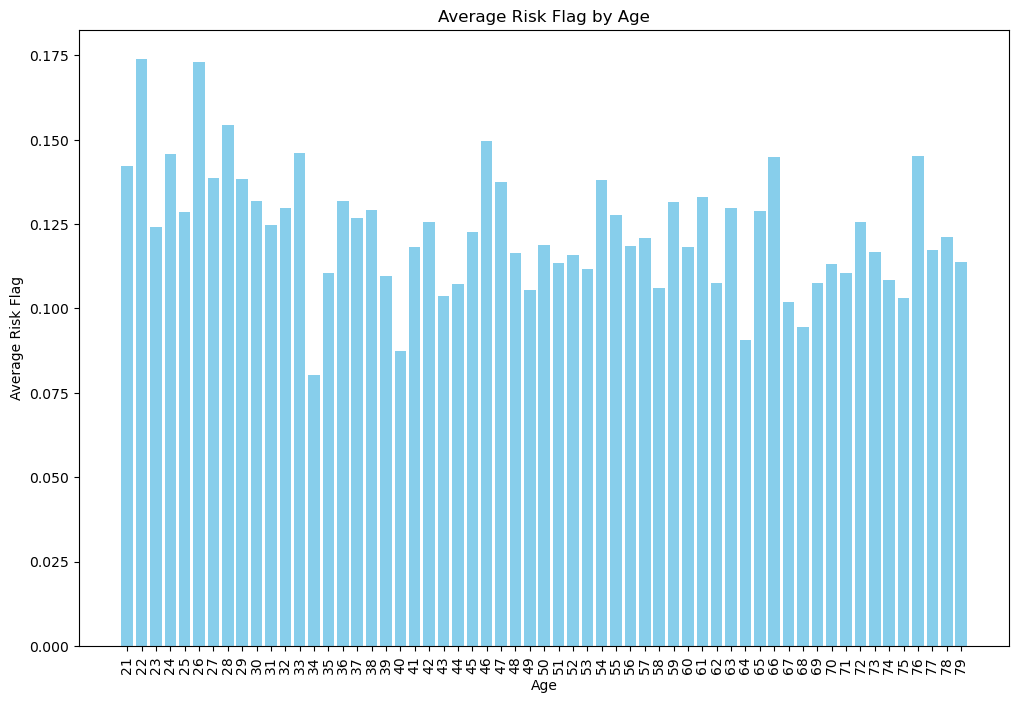

In [4]:
# visual for age and risk flag 

# Calculating the average risk flag for each age
age_risk = df.groupby('Age')['Risk_Flag'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.bar(age_risk['Age'].astype(str), age_risk['Risk_Flag'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Average Risk Flag')
plt.title('Average Risk Flag by Age')
plt.xticks(rotation=90) 
plt.show()

The visual above shows the average risk flag for each age. According to the visual, individuals in their 20s are most likely to be a risk for loan approval, with ages 22 and 26 being the highest risk. In the 30s age group, the risk drops slightly, with age 33 being the highest risk within this group.

As we move into the 40s, there is a significant decrease in risk, although age 46 stands out as the highest risk within this decade. In the 50s age group, the risk continues to drop, with age 54 being the highest risk among them.

Finally, for individuals aged 60 to 79, ages 66 and 76 show the highest risk, though the overall risk remains low compared to younger age groups.

In summary, the risk of loan approval tends to be higher for younger age groups, particularly those in their 20s and 30s, and decreases significantly as age increases, with only a few exceptions in the older age groups.

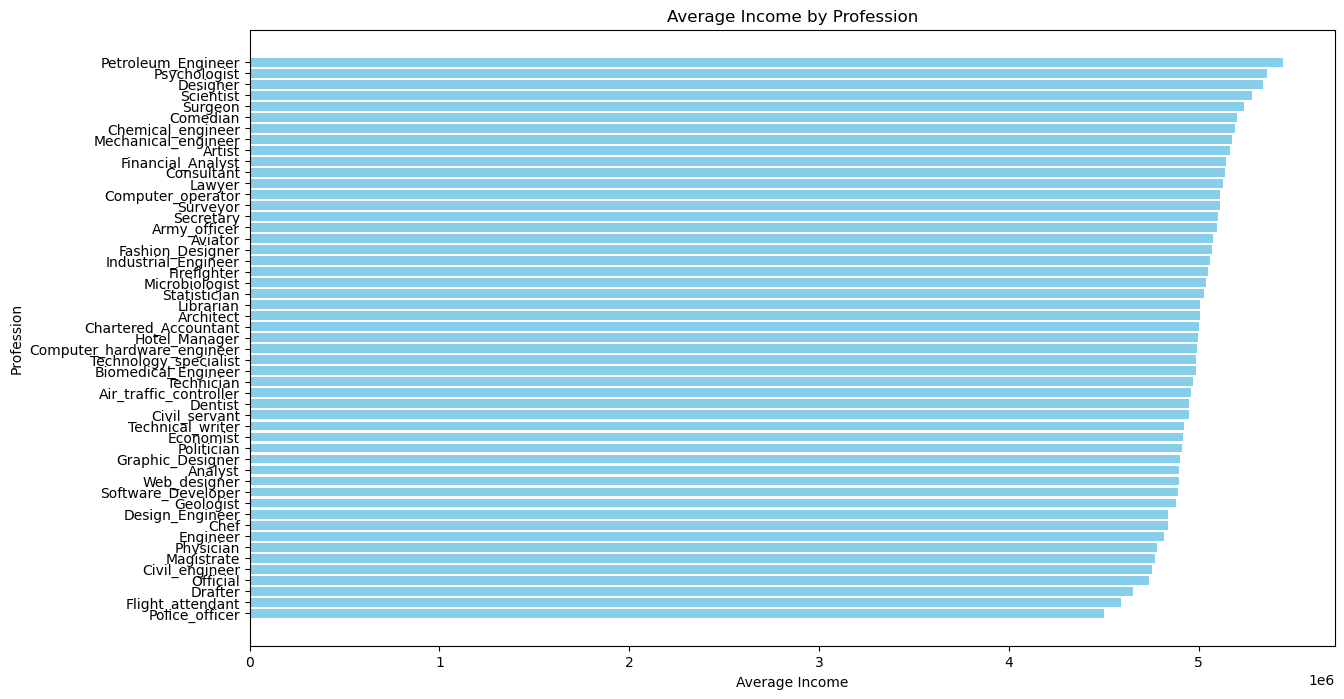

In [5]:
# Visualising the relationship between Income and Profession

# Calculating the average income for each profession
profession_income = df.groupby('Profession')['Income'].mean().reset_index()

# Sorting the data for better visualization
profession_income = profession_income.sort_values(by='Income')

plt.figure(figsize=(14, 8))
plt.barh(profession_income['Profession'], profession_income['Income'], color='skyblue')
plt.xlabel('Average Income')
plt.ylabel('Profession')
plt.title('Average Income by Profession')
plt.show()

# Model Training & Evaluation

In [19]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print(f"Logistic Regression F1 Score: {f1_lr:.4f}")

Logistic Regression F1 Score: 0.8180


In [21]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)  # No scaling needed
y_pred_rf = rf_model.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest F1 Score: {f1_rf:.4f}")

Random Forest F1 Score: 0.8959


In [22]:
# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
print(f"Naive Bayes F1 Score: {f1_nb:.4f}")

Naive Bayes F1 Score: 0.8180


In [24]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print(f"Decision Tree F1 Score: {f1_dt:.4f}")

Decision Tree F1 Score: 0.8826


In [25]:
# Support Vector Machine
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print(f"SVM F1 Score: {f1_svm:.4f}")

SVM F1 Score: 0.8180


In [27]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f"KNN F1 Score: {f1_knn:.4f}")

KNN F1 Score: 0.8857


In [28]:
# Model Comparision
model_scores = {
    "Logistic Regression": f1_lr,
    "Random Forest": f1_rf,
    "Naive Bayes": f1_nb,
    "Decision Tree": f1_dt,
    "SVM": f1_svm,
    "KNN": f1_knn
}

# Displaying all scores
for model, score in model_scores.items():
    print(f"{model}: F1 Score = {score:.4f}")

Logistic Regression: F1 Score = 0.8180
Random Forest: F1 Score = 0.8959
Naive Bayes: F1 Score = 0.8180
Decision Tree: F1 Score = 0.8826
SVM: F1 Score = 0.8180
KNN: F1 Score = 0.8857
